# Database

## First

Retrieve IBOV's data. From five years to now.

## Second

Add technical features: RSI, Bollinger Bands, STOCH, Williams %R, ROC, SMA, EMA, CCI, OBV, MACD, STOCHRSI.


# First

In [2]:
import pandas as pd
from yahooquery import Ticker

ticker = "^BVSP"
stock = Ticker(ticker)
start='2016-12-01'
end='2021-11-29'

df = stock.history(start=start, end = end)

In [3]:
df = df.xs(ticker)

<AxesSubplot:title={'center':'Line plot of brazilian IBOV index'}, xlabel='date'>

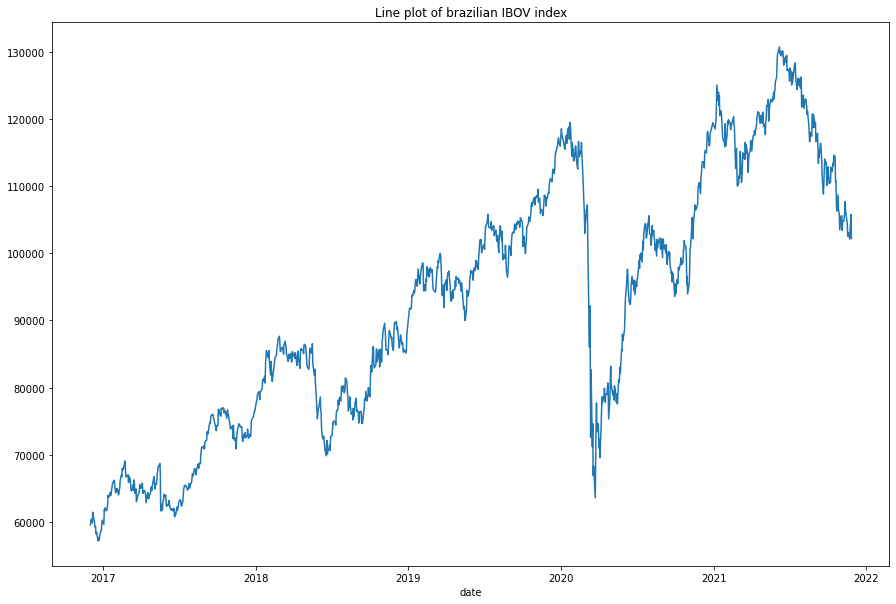

In [3]:
df.close.plot(kind="line", title = "Line plot of brazilian IBOV index", figsize=(15, 10))

# Second

## RSI

In [4]:
delta = df["close"].diff()
ups = delta.clip(lower=0) #positive variations
down = -1*delta.clip(upper=0) #negative variations
sma_up = ups.rolling(window=14).mean()
sma_down = down.rolling(window=14).mean()
rs = sma_up/sma_down
df['rsi'] = 100 - (100/(1+rs))

<AxesSubplot:title={'center':"Line plot of brazilian IBOV index' RSI"}, xlabel='date'>

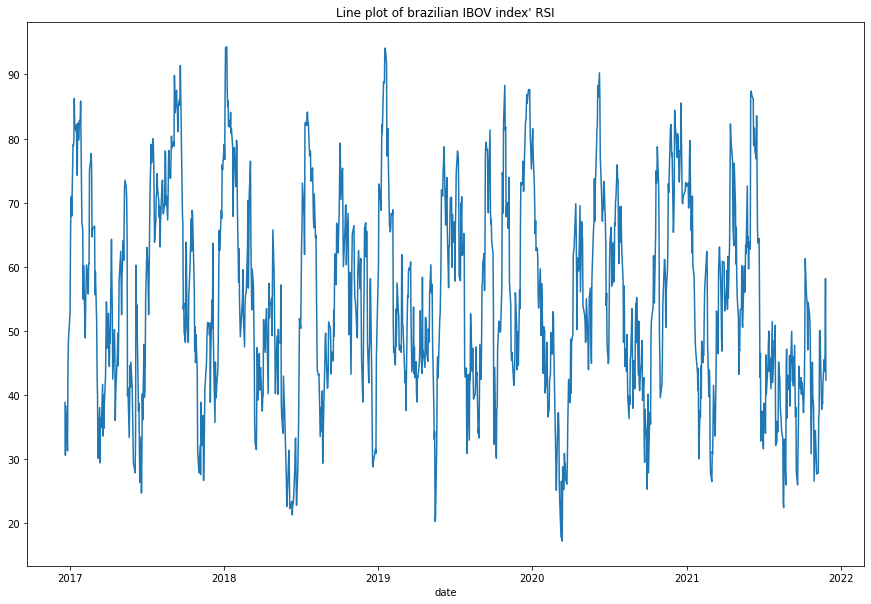

In [5]:
df.rsi.plot(kind="line", title = "Line plot of brazilian IBOV index' RSI", figsize=(15, 10))

## Bollinger Bands

In [6]:
tp = (df['close'] + df['low'] + df['high'])/3
stddev = tp.rolling(20).std(ddof=0)
df['BOLM'] = tp.rolling(20).mean()
df['BOLU'] = df['BOLM'] + 2*stddev
df['BOLD'] = df['BOLM'] - 2*stddev

In [7]:
df[["BOLM", "BOLU", "BOLD"]]

,BOLM,BOLU,BOLD
date,,,
2016-12-01,NaN,NaN,NaN
2016-12-02,NaN,NaN,NaN
2016-12-05,NaN,NaN,NaN
2016-12-06,NaN,NaN,NaN
2016-12-07,NaN,NaN,NaN
...,...,...,...
2021-11-22,105290.333333,108301.142837,102279.523830
2021-11-23,105160.200000,108321.729858,101998.670142
2021-11-24,104954.133333,107840.398589,102067.868077


## STOCH

In [8]:
high_14 = df['high'].rolling(14).max()
low_14 = df['low'].rolling(14).min()
pctK = (df['close'] - low_14)*100/(high_14 - low_14)
df['STOCH'] = pctK.rolling(3).mean()

In [9]:
df["STOCH"]

date
2016-12-01          NaN
2016-12-02          NaN
2016-12-05          NaN
2016-12-06          NaN
2016-12-07          NaN
                ...    
2021-11-22     8.209366
2021-11-23    14.919765
2021-11-24    23.162227
2021-11-25    42.213568
2021-11-26    36.335931
Name: STOCH, Length: 1233, dtype: float64

## Williams %R

In [10]:
high14 = df['high'].rolling(14).max() 
low14 = df['low'].rolling(14).min()
df['%R'] = -100 * ((high14 - df['close']) / (high14 - low14))

In [11]:
df['%R']

date
2016-12-01          NaN
2016-12-02          NaN
2016-12-05          NaN
2016-12-06          NaN
2016-12-07          NaN
                ...    
2021-11-22   -98.377160
2021-11-23   -72.205394
2021-11-24   -59.930766
2021-11-25   -41.223136
2021-11-26   -89.838305
Name: %R, Length: 1233, dtype: float64

## ROC

In [12]:
cn = df['close'].shift(14)
df['ROC'] = ((df['close'] - cn)/cn)*100

In [13]:
df['ROC']

date
2016-12-01         NaN
2016-12-02         NaN
2016-12-05         NaN
2016-12-06         NaN
2016-12-07         NaN
                ...   
2021-11-22   -1.332354
2021-11-23   -1.788709
2021-11-24   -1.044339
2021-11-25    2.319847
2021-11-26   -2.480348
Name: ROC, Length: 1233, dtype: float64

## SMA

In [18]:
df['SMA'] = df.close.rolling(window=14).mean()

In [23]:
df['SMA']

date
2016-12-01              NaN
2016-12-02              NaN
2016-12-05              NaN
2016-12-06              NaN
2016-12-07              NaN
                  ...      
2021-11-22    104632.785714
2021-11-23    104497.928571
2021-11-24    104419.142857
2021-11-25    104590.500000
2021-11-26    104404.785714
Name: SMA, Length: 1233, dtype: float64

## EMA

In [30]:
df['EMA'] = pd.Series.ewm(df['close'], span=14).mean()

In [31]:
df['EMA']

date
2016-12-01     59507.000000
2016-12-02     59940.392857
2016-12-05     59898.986418
2016-12-06     60262.739213
2016-12-07     60563.101391
                  ...      
2021-11-22    104656.035205
2021-11-23    104523.630511
2021-11-24    104522.346443
2021-11-25    104694.166917
2021-11-26    104364.811328
Name: EMA, Length: 1233, dtype: float64

## MACD

In [32]:
EMA26 = pd.Series.ewm(df['close'], span=26).mean()
EMA12 = pd.Series.ewm(df['close'], span=12).mean()

df["MACD"] = EMA26 - EMA12

In [33]:
df["MACD"]

date
2016-12-01       0.000000
2016-12-02     -18.150641
2016-12-05      -8.118708
2016-12-06     -48.704421
2016-12-07     -82.705030
                 ...     
2021-11-22    1982.762595
2021-11-23    1891.645816
2021-11-24    1730.814769
2021-11-25    1481.618766
2021-11-26    1555.637638
Name: MACD, Length: 1233, dtype: float64

## CCI

In [34]:
SMA20 = df.close.rolling(window=20).mean()

stddev = df.close.rolling(20).std(ddof=0)

df['CCI'] = (df.close - SMA20)/(0.15*stddev)

In [35]:
df['CCI']

date
2016-12-01          NaN
2016-12-02          NaN
2016-12-05          NaN
2016-12-06          NaN
2016-12-07          NaN
                ...    
2021-11-22   -11.598607
2021-11-23    -5.057708
2021-11-24    -1.068799
2021-11-25     5.008295
2021-11-26   -10.199824
Name: CCI, Length: 1233, dtype: float64

# OBV

In [40]:
import numpy as np

df['OBV'] = np.where(df['close'] > df['close'].shift(1), df['volume'], np.where(df['close'] < df['close'].shift(1), -df['volume'], 0)).cumsum()

In [42]:
df['OBV']

date
2016-12-01            0.0
2016-12-02      4344200.0
2016-12-05      1483000.0
2016-12-06      5089500.0
2016-12-07      8931200.0
                 ...     
2021-11-22    358808100.0
2021-11-23    371840500.0
2021-11-24    382307100.0
2021-11-25    390197500.0
2021-11-26    379228400.0
Name: OBV, Length: 1233, dtype: float64

## STOCHRSI

In [43]:
high_rsi = df['rsi'].max()
low_rsi = df['rsi'].min()
df['STOCHrsi'] = (df['rsi'] - low_rsi)*100/(high_rsi - low_rsi)

In [44]:
df

,open,low,high,close,volume,adjclose,rsi,BOLM,BOLU,BOLD,STOCH,%R,ROC,SMA,EMA,MACD,CCI,OBV,STOCHrsi
date,,,,,,,,,,,,,,,,,,,
2016-12-01,61906.0,59058.0,61911.0,59507.0,5352800.0,59507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59507.000000,0.000000,NaN,0.0,NaN
2016-12-02,59499.0,58092.0,60379.0,60316.0,4344200.0,60316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59940.392857,-18.150641,NaN,4344200.0,NaN
2016-12-05,60322.0,59635.0,60720.0,59832.0,2861200.0,59832.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59898.986418,-8.118708,NaN,1483000.0,NaN
2016-12-06,59828.0,59396.0,61235.0,61088.0,3606500.0,61088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60262.739213,-48.704421,NaN,5089500.0,NaN
2016-12-07,61111.0,61062.0,61918.0,61414.0,3841700.0,61414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60563.101391,-82.705030,NaN,8931200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,103036.0,102122.0,104613.0,102122.0,10410000.0,102122.0,45.506680,105290.333333,108301.142837,102279.523830,8.209366,-98.377160,-1.332354,104632.785714,104656.035205,1982.762595,-11.598607,358808100.0,36.746732
2021-11-23,102124.0,101736.0,103692.0,103663.0,13032400.0,103663.0,43.637099,105160.200000,108321.729858,101998.670142,14.919765,-72.205394,-1.788709,104497.928571,104523.630511,1891.645816,-5.057708,371840500.0,34.323449
2021-11-24,103652.0,102464.0,105041.0,104514.0,10466600.0,104514.0,46.469496,104954.133333,107840.398589,102067.868077,23.162227,-59.930766,-1.044339,104419.142857,104522.346443,1730.814769,-1.068799,382307100.0,37.994701


In [45]:
df.to_csv('database.csv')